In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

In [29]:
df_train= pd.read_csv('SPECTF_train.csv')
df_train

1   67   68   73   78   65   63   67.1   60   63.1  ...   61.2   56.1  \
0    1   75   74   71   71   62   58     70   64     71  ...     66     62   
1    1   83   64   66   67   67   74     74   72     64  ...     67     64   
2    1   72   66   65   65   64   61     71   78     73  ...     69     68   
3    1   62   60   69   61   63   63     70   68     70  ...     66     66   
4    1   68   63   67   67   65   72     74   72     70  ...     70     70   
..  ..  ...  ...  ...  ...  ...  ...    ...  ...    ...  ...    ...    ...   
181  0   74   69   75   70   70   74     77   77     65  ...     66     67   
182  0   72   61   64   66   64   59     68   66     76  ...     69     64   
183  0   75   73   72   77   68   67     76   73     67  ...     70     67   
184  0   59   62   72   74   66   66     74   76     63  ...     65     71   
185  0   64   66   68   71   62   64     74   73     63  ...     70     69   

      76.3   75.1   74.1   77   76.4   74.2   59.1   68.3  
0       68     69     69   66     64     58     57     52  
1       69     63     68   54     65     64     43     42  
2       68     63     71   72     65     63     58     60  
3       58     56     72   73     71     64     49     42  
4       70     67     77   71     77     72     68     59  
..     ...    ...    ...  ...    ...    ...    ...    ...  
181     63     61     71   68     66     65     54     57  
182     67     71     69   68     65     73     56     52  
183     72     71     79   75     77     75     67     71  
184     67     69     77   78     77     76     70     70  
185     68     65     75   72     62     64     57     54  

[186 rows x 45 columns]

In [30]:
x = df_train.iloc[:, :].values

In [31]:
x

array([[ 1, 75, 74, ..., 58, 57, 52],
       [ 1, 83, 64, ..., 64, 43, 42],
       [ 1, 72, 66, ..., 63, 58, 60],
       ...,
       [ 0, 75, 73, ..., 75, 67, 71],
       [ 0, 59, 62, ..., 76, 70, 70],
       [ 0, 64, 66, ..., 64, 57, 54]], dtype=int64)

In [32]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))

In [33]:
df_train_scaled = min_max_scaler.fit_transform(x)
df_train_scaled

array([[1.        , 0.86666667, 0.89830508, ..., 0.67567568, 0.63768116,
        0.71641791],
       [1.        , 1.        , 0.72881356, ..., 0.75675676, 0.43478261,
        0.56716418],
       [1.        , 0.81666667, 0.76271186, ..., 0.74324324, 0.65217391,
        0.8358209 ],
       ...,
       [0.        , 0.86666667, 0.88135593, ..., 0.90540541, 0.7826087 ,
        1.        ],
       [0.        , 0.6       , 0.69491525, ..., 0.91891892, 0.82608696,
        0.98507463],
       [0.        , 0.68333333, 0.76271186, ..., 0.75675676, 0.63768116,
        0.74626866]])

In [34]:
train_df = pd.DataFrame(df_train_scaled)

In [35]:
train_df

0         1         2         3     4         5         6         7   \
0    1.0  0.866667  0.898305  0.750000  0.74  0.672131  0.611111  0.765625   
1    1.0  1.000000  0.728814  0.636364  0.66  0.754098  0.907407  0.828125   
2    1.0  0.816667  0.762712  0.613636  0.62  0.704918  0.666667  0.781250   
3    1.0  0.650000  0.661017  0.704545  0.54  0.688525  0.703704  0.765625   
4    1.0  0.750000  0.711864  0.659091  0.66  0.721311  0.870370  0.828125   
..   ...       ...       ...       ...   ...       ...       ...       ...   
181  0.0  0.850000  0.813559  0.840909  0.72  0.803279  0.907407  0.875000   
182  0.0  0.816667  0.677966  0.590909  0.64  0.704918  0.629630  0.734375   
183  0.0  0.866667  0.881356  0.772727  0.86  0.770492  0.777778  0.859375   
184  0.0  0.600000  0.694915  0.772727  0.80  0.737705  0.759259  0.828125   
185  0.0  0.683333  0.762712  0.681818  0.74  0.672131  0.722222  0.828125   

           8         9   ...        35        36        37        38  \
0    0.721311  0.921875  ...  0.827586  0.761905  0.744681  0.836066   
1    0.852459  0.812500  ...  0.844828  0.793651  0.765957  0.737705   
2    0.950820  0.953125  ...  0.879310  0.857143  0.744681  0.737705   
3    0.786885  0.906250  ...  0.827586  0.825397  0.531915  0.622951   
4    0.852459  0.906250  ...  0.896552  0.888889  0.787234  0.803279   
..        ...       ...  ...       ...       ...       ...       ...   
181  0.934426  0.828125  ...  0.827586  0.841270  0.638298  0.704918   
182  0.754098  1.000000  ...  0.879310  0.793651  0.723404  0.868852   
183  0.868852  0.859375  ...  0.896552  0.841270  0.829787  0.868852   
184  0.918033  0.796875  ...  0.810345  0.904762  0.723404  0.836066   
185  0.868852  0.796875  ...  0.896552  0.873016  0.744681  0.770492   

           39        40        41        42        43        44  
0    0.828571  0.800000  0.766234  0.675676  0.637681  0.716418  
1    0.814286  0.640000  0.779221  0.756757  0.434783  0.567164  
2    0.857143  0.880000  0.779221  0.743243  0.652174  0.835821  
3    0.871429  0.893333  0.857143  0.756757  0.521739  0.567164  
4    0.942857  0.866667  0.935065  0.864865  0.797101  0.820896  
..        ...       ...       ...       ...       ...       ...  
181  0.857143  0.826667  0.792208  0.770270  0.594203  0.791045  
182  0.828571  0.826667  0.779221  0.878378  0.623188  0.716418  
183  0.971429  0.920000  0.935065  0.905405  0.782609  1.000000  
184  0.942857  0.960000  0.935065  0.918919  0.826087  0.985075  
185  0.914286  0.880000  0.740260  0.756757  0.637681  0.746269  

[186 rows x 45 columns]

In [36]:
df_test= pd.read_csv('SPECTF_test.csv')
df_test

1   67   68   73   78   65   63   67.1   60   63.1  ...   61.2   56.1  \
0    1   75   74   71   71   62   58     70   64     71  ...     66     62   
1    1   83   64   66   67   67   74     74   72     64  ...     67     64   
2    1   72   66   65   65   64   61     71   78     73  ...     69     68   
3    1   62   60   69   61   63   63     70   68     70  ...     66     66   
4    1   68   63   67   67   65   72     74   72     70  ...     70     70   
..  ..  ...  ...  ...  ...  ...  ...    ...  ...    ...  ...    ...    ...   
181  0   74   69   75   70   70   74     77   77     65  ...     66     67   
182  0   72   61   64   66   64   59     68   66     76  ...     69     64   
183  0   75   73   72   77   68   67     76   73     67  ...     70     67   
184  0   59   62   72   74   66   66     74   76     63  ...     65     71   
185  0   64   66   68   71   62   64     74   73     63  ...     70     69   

      76.3   75.1   74.1   77   76.4   74.2   59.1   68.3  
0       68     69     69   66     64     58     57     52  
1       69     63     68   54     65     64     43     42  
2       68     63     71   72     65     63     58     60  
3       58     56     72   73     71     64     49     42  
4       70     67     77   71     77     72     68     59  
..     ...    ...    ...  ...    ...    ...    ...    ...  
181     63     61     71   68     66     65     54     57  
182     67     71     69   68     65     73     56     52  
183     72     71     79   75     77     75     67     71  
184     67     69     77   78     77     76     70     70  
185     68     65     75   72     62     64     57     54  

[186 rows x 45 columns]

In [37]:
x = df_test.iloc[:, :].values

In [38]:
x

array([[ 1, 75, 74, ..., 58, 57, 52],
       [ 1, 83, 64, ..., 64, 43, 42],
       [ 1, 72, 66, ..., 63, 58, 60],
       ...,
       [ 0, 75, 73, ..., 75, 67, 71],
       [ 0, 59, 62, ..., 76, 70, 70],
       [ 0, 64, 66, ..., 64, 57, 54]], dtype=int64)

In [39]:
df_test_scaled = min_max_scaler.fit_transform(x)
df_test_scaled

array([[1.        , 0.86666667, 0.89830508, ..., 0.67567568, 0.63768116,
        0.71641791],
       [1.        , 1.        , 0.72881356, ..., 0.75675676, 0.43478261,
        0.56716418],
       [1.        , 0.81666667, 0.76271186, ..., 0.74324324, 0.65217391,
        0.8358209 ],
       ...,
       [0.        , 0.86666667, 0.88135593, ..., 0.90540541, 0.7826087 ,
        1.        ],
       [0.        , 0.6       , 0.69491525, ..., 0.91891892, 0.82608696,
        0.98507463],
       [0.        , 0.68333333, 0.76271186, ..., 0.75675676, 0.63768116,
        0.74626866]])

In [40]:
test_df = pd.DataFrame(df_test_scaled)

In [41]:
test_df

0         1         2         3     4         5         6         7   \
0    1.0  0.866667  0.898305  0.750000  0.74  0.672131  0.611111  0.765625   
1    1.0  1.000000  0.728814  0.636364  0.66  0.754098  0.907407  0.828125   
2    1.0  0.816667  0.762712  0.613636  0.62  0.704918  0.666667  0.781250   
3    1.0  0.650000  0.661017  0.704545  0.54  0.688525  0.703704  0.765625   
4    1.0  0.750000  0.711864  0.659091  0.66  0.721311  0.870370  0.828125   
..   ...       ...       ...       ...   ...       ...       ...       ...   
181  0.0  0.850000  0.813559  0.840909  0.72  0.803279  0.907407  0.875000   
182  0.0  0.816667  0.677966  0.590909  0.64  0.704918  0.629630  0.734375   
183  0.0  0.866667  0.881356  0.772727  0.86  0.770492  0.777778  0.859375   
184  0.0  0.600000  0.694915  0.772727  0.80  0.737705  0.759259  0.828125   
185  0.0  0.683333  0.762712  0.681818  0.74  0.672131  0.722222  0.828125   

           8         9   ...        35        36        37        38  \
0    0.721311  0.921875  ...  0.827586  0.761905  0.744681  0.836066   
1    0.852459  0.812500  ...  0.844828  0.793651  0.765957  0.737705   
2    0.950820  0.953125  ...  0.879310  0.857143  0.744681  0.737705   
3    0.786885  0.906250  ...  0.827586  0.825397  0.531915  0.622951   
4    0.852459  0.906250  ...  0.896552  0.888889  0.787234  0.803279   
..        ...       ...  ...       ...       ...       ...       ...   
181  0.934426  0.828125  ...  0.827586  0.841270  0.638298  0.704918   
182  0.754098  1.000000  ...  0.879310  0.793651  0.723404  0.868852   
183  0.868852  0.859375  ...  0.896552  0.841270  0.829787  0.868852   
184  0.918033  0.796875  ...  0.810345  0.904762  0.723404  0.836066   
185  0.868852  0.796875  ...  0.896552  0.873016  0.744681  0.770492   

           39        40        41        42        43        44  
0    0.828571  0.800000  0.766234  0.675676  0.637681  0.716418  
1    0.814286  0.640000  0.779221  0.756757  0.434783  0.567164  
2    0.857143  0.880000  0.779221  0.743243  0.652174  0.835821  
3    0.871429  0.893333  0.857143  0.756757  0.521739  0.567164  
4    0.942857  0.866667  0.935065  0.864865  0.797101  0.820896  
..        ...       ...       ...       ...       ...       ...  
181  0.857143  0.826667  0.792208  0.770270  0.594203  0.791045  
182  0.828571  0.826667  0.779221  0.878378  0.623188  0.716418  
183  0.971429  0.920000  0.935065  0.905405  0.782609  1.000000  
184  0.942857  0.960000  0.935065  0.918919  0.826087  0.985075  
185  0.914286  0.880000  0.740260  0.756757  0.637681  0.746269  

[186 rows x 45 columns]

In [42]:
X_train = train_df.iloc[:,1:].values
Y_train = train_df.iloc[:,0].values

In [43]:
X_train

array([[0.86666667, 0.89830508, 0.75      , ..., 0.67567568, 0.63768116,
        0.71641791],
       [1.        , 0.72881356, 0.63636364, ..., 0.75675676, 0.43478261,
        0.56716418],
       [0.81666667, 0.76271186, 0.61363636, ..., 0.74324324, 0.65217391,
        0.8358209 ],
       ...,
       [0.86666667, 0.88135593, 0.77272727, ..., 0.90540541, 0.7826087 ,
        1.        ],
       [0.6       , 0.69491525, 0.77272727, ..., 0.91891892, 0.82608696,
        0.98507463],
       [0.68333333, 0.76271186, 0.68181818, ..., 0.75675676, 0.63768116,
        0.74626866]])

In [44]:
Y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
X_test = test_df.iloc[:,1:].values
Y_test = test_df.iloc[:,0].values

In [46]:
X_test

array([[0.86666667, 0.89830508, 0.75      , ..., 0.67567568, 0.63768116,
        0.71641791],
       [1.        , 0.72881356, 0.63636364, ..., 0.75675676, 0.43478261,
        0.56716418],
       [0.81666667, 0.76271186, 0.61363636, ..., 0.74324324, 0.65217391,
        0.8358209 ],
       ...,
       [0.86666667, 0.88135593, 0.77272727, ..., 0.90540541, 0.7826087 ,
        1.        ],
       [0.6       , 0.69491525, 0.77272727, ..., 0.91891892, 0.82608696,
        0.98507463],
       [0.68333333, 0.76271186, 0.68181818, ..., 0.75675676, 0.63768116,
        0.74626866]])

In [47]:
Y_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3) 

In [49]:
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
Y_pred = neigh.predict(X_test)
Y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.])

In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = neigh.predict(X_train)
mse = mean_squared_error(Y_train, train_preds)
rmse = sqrt(mse)
rmse

0.254000254000381

In [50]:
print('Confusion Matrix: ',confusion_matrix(Y_test,Y_pred))
print('Performance metrics: ',classification_report(Y_test,Y_pred))
print('Accuracy: ',accuracy_score(Y_test, Y_pred)*100,"%")

Confusion Matrix:  [[  5  10]
 [  2 169]]
Performance metrics:                precision    recall  f1-score   support

         0.0       0.71      0.33      0.45        15
         1.0       0.94      0.99      0.97       171

    accuracy                           0.94       186
   macro avg       0.83      0.66      0.71       186
weighted avg       0.93      0.94      0.92       186

Accuracy:  93.54838709677419 %


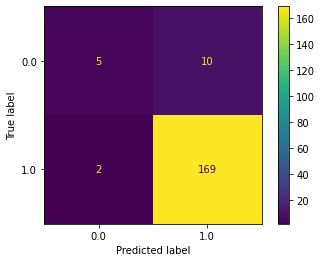

In [51]:
plot_confusion_matrix(neigh, X_test, Y_test)  
plt.show()

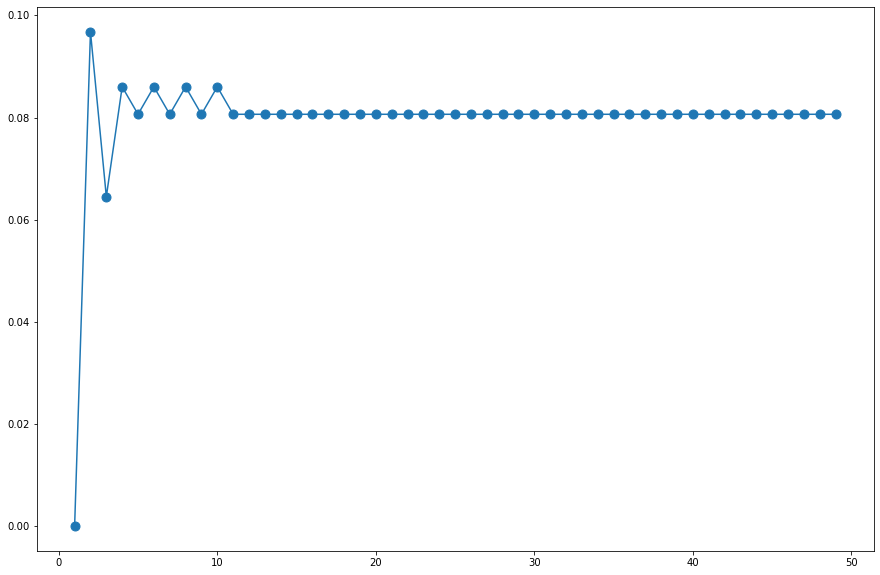

In [27]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != Y_test))


plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)